# Librerías 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.integrate import odeint, solve_ivp
import sympy as smp

# Ejercicio 5

<img align="center" style="width: 1000px;" src="Ejercicio5.png">

## Ecuaciones del Sistema - Ley de Kirchhoff de Voltajes

$-E + L(\ddot{q_{1}}-\ddot{q_{3}}) + \frac{q_{1}-q_{2}}{C_{1}} = 0$

$\frac{q_{2}-q_{1}}{C_{1}} + R(\dot{q_{2}}-\dot{q_{3}}) + R\dot{q_{2}} = 0$

$\frac{q_{3}}{C_{2}} + L(\ddot{q_{3}} - \ddot{q_{1}}) + R(\dot{q_{3}} - \dot{q_{2}}) = 0$

$-E + \frac{q_{3}}{C_{2}} + R\dot{q_{2}} = 0$


## Ecuaciones en el Dominio de Laplace

Condiciones iniciales para $q_{i}$ y $\dot{q_{i}}$ iguales a 0 (Elementos que almacenan cargas vacías)

$-\frac{E}{s} + L(s^2Q_{1}(s)-s^2Q_{3}(s)) + \frac{Q_{1}(s)-Q_{2}(s)}{C_{1}} = 0$

$\frac{Q_{2}(s)-Q_{1}(s)}{C_{1}} + R(sQ_{2}(s)-sQ_{3}(s)) + R(sQ_{2}(s)) = 0$

$\frac{Q_{3}(s)}{C_{2}} + L(s^2Q_{3}(s) - s^2Q_{1}(s)) + R(sQ_{3}(s) - sQ_{2}(s)) = 0$

$-\frac{E}{s} + \frac{Q_{3}(s)}{C_{2}} + R(sQ_{2}(s)) = 0$

## Ecuaciones con Impedancias

$\frac{1}{LS}(\frac{E}{S} - V_{1}) -V_{1}(SC_{1}) - \frac{1}{R}(V_{1}-V_{2})$


$(\frac{E}{S} - V_{2})(SC_{2}) + \frac{1}{R}(V_{1} - V_{2}) - \frac{V_{2}}{R}$

## Solución de las Ecuaciones Con Impedancias

In [56]:
s = smp.symbols('s')
t = smp.symbols('t', positive=True, real=True)

In [57]:
R = 1000   
C1 = 10*10**-6
C2 = 10*10**-6
L = 1
E = 5

Variables Dependientes de s en el sistema de Impedancias

In [58]:
V1 = smp.symbols('V1', cls = smp.Function)
V1 = V1(s)

V2 = smp.symbols('V2', cls = smp.Function)
V2 = V2(s)

In [59]:
E1 = (1/(L*s))*((E/s)-V1) - V1*s*C1 - (1/R)*(V1-V2)

E2 = ((E/s)-V2)*s*C2 -V2/R +(1/R)*(V1-V2)

E1 = E1.simplify()
E2 = E2.simplify()

In [60]:
E1

-1.0e-5*s*V1(s) - 0.001*V1(s) + 0.001*V2(s) - V1(s)/s + 5/s**2

In [61]:
E2

-1.0e-5*s*V2(s) + 0.001*V1(s) - 0.002*V2(s) + 5.0e-5

In [62]:
sols2 = smp.solve([E1,E2], (V1,V2))
v1s = sols2[V1]
v2s = sols2[V2]

In [63]:
v1t = smp.inverse_laplace_transform(v1s, s, t)
v2t = smp.inverse_laplace_transform(v2s, s, t)

Convertir las expresiones simbólicas en funciones mediante `smp.lambdify`

In [64]:
v1 = smp.lambdify(t, v1t)
v2 = smp.lambdify(t, v2t)

### Gráfica de la Solución con Impedancias

In [65]:
time = np.linspace(0, 0.1, 1000)

In [66]:
Vc1 = v1(time)
Vc2 = abs(5 - v2(time))
Vl = abs(5 - v1(time))

Hallar las corrientes de forma numérica

In [67]:
i1 = np.diff(Vc1)/np.diff(time)
i2 = i1 + (1/L)*np.cumsum(Vl[:-1]*np.diff(time))
i3 = v2(time)/1000

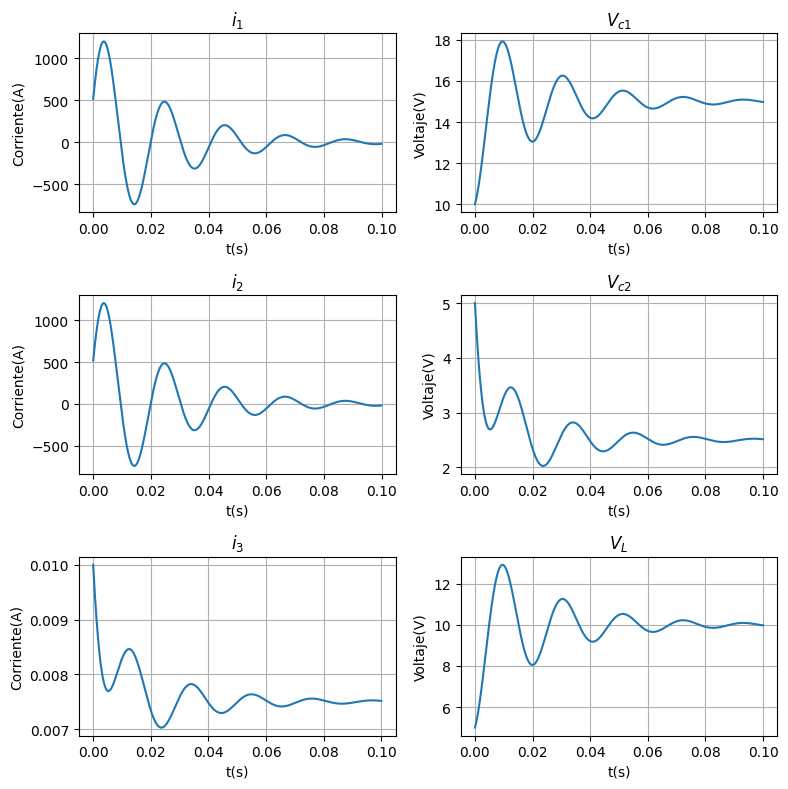

In [68]:
fig, axs = plt.subplots(3, 2, figsize=(8, 8))

# Corriente 1
axs[0][0].plot(time[:-1], i1)
axs[0][0].set_title('$i_{1}$')
axs[0][0].set_xlabel('t(s)')
axs[0][0].set_ylabel('Corriente(A)')
axs[0][0].grid()

# Corriente 2
axs[1][0].plot(time[:-1], i2)
axs[1][0].set_title('$i_{2}$')
axs[1][0].set_xlabel('t(s)')
axs[1][0].set_ylabel('Corriente(A)')
axs[1][0].grid()

# Corriente 3
axs[2][0].plot(time, i3)
axs[2][0].set_title('$i_{3}$')
axs[2][0].set_xlabel('t(s)')
axs[2][0].set_ylabel('Corriente(A)')
axs[2][0].grid()

# Voltaje en el capacitor 1
axs[0][1].plot(time, Vc1)
axs[0][1].set_title('$V_{c1}$')
axs[0][1].set_xlabel('t(s)')
axs[0][1].set_ylabel('Voltaje(V)')
axs[0][1].grid()

# Voltaje en el capacitor 2
axs[1][1].plot(time, Vc2)
axs[1][1].set_title('$V_{c2}$')
axs[1][1].set_xlabel('t(s)')
axs[1][1].set_ylabel('Voltaje(V)')
axs[1][1].grid()

# Voltaje en el inductor
axs[2][1].plot(time, Vl)
axs[2][1].set_title('$V_{L}$')
axs[2][1].set_xlabel('t(s)')
axs[2][1].set_ylabel('Voltaje(V)')
axs[2][1].grid()

plt.tight_layout()
plt.show()

## Solución con variables simbólicas usando Sympy
Cambiando C2 por R

In [69]:
s = smp.symbols('s')
t = smp.symbols('t', positive=True, real=True)
R = smp.symbols('R', positive=True, real=True)
C1,C2 = smp.symbols('C1 C2', positive=True, real=True)
L = smp.symbols('L', positive=True, real=True)
E = smp.symbols('E', positive=True, real=True)

Variables dependientes de s

In [70]:
Q1 = smp.symbols('Q1', cls=smp.Function)
Q1 = Q1(s)

Q2 = smp.symbols('Q2', cls=smp.Function)
Q2 = Q2(s)

Q3 = smp.symbols('Q3', cls=smp.Function)
Q3 = Q3(s)

Ecuaciones del Sistema

In [71]:
E1 = -E/s + L*(Q1 - Q3)*s**2 + (Q1 -Q2)/C1
E2 = (Q2 -Q1)/C1 + R*s*(Q2 - Q3) + R*s*Q2
E3 = R*s*(Q3) +L*(Q3 -Q1)*s**2 + R*s*(Q3 - Q2) # resistencia
#E3 = Q3/C2 +L*(Q3 -Q1)*s**2 + R*s*(Q3 - Q2) # condensador

E1 = E1.simplify()
E2 = E2.simplify()
E3 = E3.simplify()

Despejar las variables de interés Q1, Q2 y Q3

In [72]:
sols = smp.solve([E1,E2,E3], (Q1,Q2,Q3),
                simplify=False, rational=False)

### Hallar la Transformada inversa de Laplace a las soluciones

In [73]:
q1 = smp.inverse_laplace_transform(sols[Q1], s, t)
q2 = smp.inverse_laplace_transform(sols[Q2], s, t)
q3 = smp.inverse_laplace_transform(sols[Q3], s, t)

Convertir las expresiones simbólicas en funciones mediante `smp.lambdify`

In [74]:
q1f= smp.lambdify((t,C1,C2,L,R,E), q1)
q2f= smp.lambdify((t,C1,C2,L,R,E), q2)
q3f= smp.lambdify((t,C1,C2,L,R,E), q3)

### Gráfica de la Solución

In [75]:
@interact(R=(1, 10, 1), C1=(10, 100, 10), C2=(10, 100, 1), L=(1, 10, 1), E=(1, 10, 1), tf=(1, 10, 1))

def interactive_plot( R = 1, C1 = 10, C2 = 10, L = 1, E = 5, tf = 1):

    R = 1000*R
    C1 = C1/(10**6)
    C2 = C2/(10**6)
    L = L
    tf = tf/10
    
    t = np.linspace(0, tf, 1001)
    ts = t[:-1]
    ts1 = ts[:-1]

    q1 = q1f(t,C1,C2,L,R,E)
    q2 = q2f(t,C1,C2,L,R,E)
    q3 = q3f(t,C1,C2,L,R,E)

    #Se deriva numéricamente la carga para obtener la corriente

    i1 = np.diff(q1)/np.diff(t) 
    i2 = np.diff(q2)/np.diff(t)
    i3 = np.diff(q3)/np.diff(t)


    #Se integra numéricamente la corriente para el voltaje en el capacitor

    Vc1 = np.cumsum(((i1-i2)/C1)*np.diff(t))
    Vr = R*i3
    Vl = L*(np.diff(i1-i3)/np.diff(ts))

    fig, axs = plt.subplots(3, 2, figsize=(8, 8))
    
    # Corriente 1
    axs[0][0].plot(ts, i1)
    axs[0][0].set_title('$i_{1}$')
    axs[0][0].set_xlabel('t(s)')
    axs[0][0].set_ylabel('Corriente(A)')
    axs[0][0].grid()

    # Corriente 2
    axs[1][0].plot(ts, i2)
    axs[1][0].set_title('$i_{2}$')
    axs[1][0].set_xlabel('t(s)')
    axs[1][0].set_ylabel('Corriente(A)')
    axs[1][0].grid()

    # Corriente 3
    axs[2][0].plot(ts, i3)
    axs[2][0].set_title('$i_{3}$')
    axs[2][0].set_xlabel('t(s)')
    axs[2][0].set_ylabel('Corriente(A)')
    axs[2][0].grid()

    # Voltaje en el capacitor 1
    axs[0][1].plot(ts, Vc1)
    axs[0][1].set_title('$V_{c1}$')
    axs[0][1].set_xlabel('t(s)')
    axs[0][1].set_ylabel('Voltaje(V)')
    axs[0][1].grid()

    # Voltaje en el Resistor
    axs[1][1].plot(ts, Vr)
    axs[1][1].set_title('$V_{R}$')
    axs[1][1].set_xlabel('t(s)')
    axs[1][1].set_ylabel('Voltaje(V)')
    axs[1][1].grid()

    # Voltaje en el inductor
    axs[2][1].plot(ts1, Vl)
    axs[2][1].set_title('$V_{L}$')
    axs[2][1].set_xlabel('t(s)')
    axs[2][1].set_ylabel('Voltaje(V)')
    axs[2][1].grid()

    plt.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=1, description='R', max=10, min=1), IntSlider(value=10, description='C1'…